# CS/CMDA 3654 Project Part III

Group Name: Code Workers<br>
Group Members: Name | PID | Email <br>
               Daniele Correa | dcorrea | dcorrea@vt.edu <br>
               Wanqian Wei | weiw01 | weiw01@vt.edu<br>
               Bilal Taha | theswag | theswag@vt.edu

In [1]:
import pandas
import numpy
import matplotlib.pyplot
import sklearn.manifold
import nose.tools
import sklearn.cluster
%matplotlib inline

## Hypothesis: 


**Hypothesis 1:** The culprit is an employee who tried logging into a computer even after their termination

**Analysis: **

Here we will import the list of "fired" employees and the file that contains the logon info. We will then attempt to check if any employees accounts were used after they were fired.

In [2]:
stopwords = set(open("stop-word-list.txt").read().splitlines())
fired = pandas.read_csv('Fired2.csv')
firedUsers = fired.user_id
logon = pandas.read_csv('logon_info.csv')
devices = pandas.read_csv('device_info.csv')

websites = pandas.read_csv('http_info.csv').sort_values('date')
websites['date'] = websites.date.str.slice(0,10)
websites = websites[websites.user.isin(firedUsers)] #filtering to keep on users in firedUsers

lastLogin  = []
for user in fired.user_id:
    logonUser = logon[logon.user == user]
    date = logonUser.tail(1).date.values
    if date.size > 0: 
        date = date[0]
    else:
        date = 'Never logged in'
    
    lastLogin.append(date)
fired['Last Log in Activity']  = lastLogin
fired

,Unnamed: 0,month,employee_name,user_id,email,role,supervisor,Last Log in Activity
0,74,5/1/17,Ruth Daphne Carver,RDC0283,Ruth.Daphne.Carver@dtaa.com,ProductionLineWorker,Nadine Anjolie Gregory,05/04/2017 17:01:00
1,434,5/1/17,Sonia Nerea Love,SNL0096,Sonia.Nerea.Love@dtaa.com,SystemsEngineer,Evan Bevis Colon,05/07/2017 18:17:00
2,567,5/1/17,Garrison George Guerrero,GGG0825,Garrison.George.Guerrero@dtaa.com,Salesman,Dennis Carson Mendoza,05/07/2017 16:30:00
3,640,5/1/17,Chris L North,CLN1234,Chris.L.North@dtaa.com,Scientist,Emmanuel Casey Wiggins,Never logged in
4,710,5/1/17,Hanae Rhiannon Lindsey,HRL0797,Hanae.Rhiannon.Lindsey@dtaa.com,ProductionLineWorker,Hector Davis Ellison,05/14/2017 15:12:00
5,793,5/1/17,Dominic Zeph Johns,DZJ0261,Dominic.Zeph.Johns@dtaa.com,HardwareEngineer,Evan Bevis Colon,05/19/2017 18:13:00
6,861,5/1/17,Halee Autumn Craft,HAC0651,Halee.Autumn.Craft@dtaa.com,SoftwareEngineer,Gabriel Camden Joseph,05/07/2017 17:15:00
7,1032,6/1/17,Scarlett Kerry Charles,SKC0670,Scarlett.Kerry.Charles@dtaa.com,ProductionLineWorker,Abraham Perry Reyes,06/16/2017 16:43:00
8,1123,6/1/17,Giacomo Hamilton Giles,GHG0667,Giacomo.Hamilton.Giles@dtaa.com,ProductionLineWorker,Abraham Perry Reyes,06/14/2017 16:50:00
9,1544,6/1/17,Ima Quintessa Williams,IQW0294,Ima.Quintessa.Williams@dtaa.com,ProductionLineWorker,Nadine Anjolie Gregory,06/25/2017 16:50:00


In [3]:
count = 0
for index, row in fired.iterrows():
    firedmonth = row.month.split('/')
    firedmonth = int(firedmonth[0])
    lastLogmonth = row['Last Log in Activity'].split('/')
    if(row['Last Log in Activity'] == 'Never logged in'):
        lastLogmonth = firedmonth
    else:
        lastLogmonth = int(lastLogmonth[0])
    if(lastLogmonth != firedmonth):
        print('suspicious user detected')   
        count = count +1
if count == 0:
    print("There are no suspicious logins")

There are no suspicious logins


**Update:** From this exploration we see that there were no suspicious logins from fired users. What does seem interesting is that there is a scientist "Chris L North" for which there exist no record of him logging in. This is suspicious as you would expect a scientist to use a computer, so we will make note of that. 


In [4]:
websitesChris = websites[websites.user == 'CLN1234']
websitesChris

,id,date,user,pc,url
5264,{F4M8-J9JZ50YF-6407DOUD},05/03/2017,CLN1234,PC-0917,http://easteregg.com/you_found_it/awesome.html


Chris L north was the scientist we took note of earlier, and his only url visited is the easter egg website found above. 

**Question: **Did the leaker look up suspicious words in the url?


In this investigation we will filter out the websites visited by the fired employees, and then conduct TFIDF analysis to look for suspicious words employees are looking up. In the stop word list file there exists "filler" words that wont give much insight combined with commonly visited websites such as: google, facebook, twitter, etc. The words in this list will be filtered out from the analysis. 

**Analysis:**

In [5]:


group = websites.groupby('date')

urls = group.url.aggregate(' '.join)
urls = urls.str.lower()
for p in ".,!?:;\"'-~()[]/\\":
    urls = urls.str.replace(p,' ')
urls = urls.apply(lambda t: [w for w in t.split() if w.isalpha() and w not in stopwords]  )
TF = urls.apply(lambda bag: pandas.Series(bag).value_counts())
TF = TF.loc[:,TF.sum() > 5]

IDF = numpy.log( float(len(TF))/TF.count() )

TFIDF = TF * IDF
TFIDF = TFIDF.reindex(sorted(TFIDF.columns), axis=1)

Answer2 = (TFIDF.sum().sort_values(ascending = False))

Answer2

org                   154.307045
hugill                138.327295
patenaude             135.311131
pelileo               131.225317
holmenkollbakken      124.985851
coupons               120.394957
suppan                118.462134
usbank                118.273095
wordpress             114.697948
wikipedia             110.042988
live                  109.430276
varitek               107.648766
tremenheere           107.346948
craigslist            105.787825
tmz                   105.151392
ltcol                 104.744598
googleusercontent     104.417192
huffingtonpost        103.370339
jarratt               101.147179
cnet                  100.732680
knox                  100.276766
hailstorm              99.539898
sokolnitz              98.770616
taua                   98.246939
conatus                97.126314
buridan                97.126314
klotzbachs             96.589657
bodiam                 96.564614
lockheedmartinjobs     95.940916
blogspot               95.027007
          

**Update:** In this list we see that there are some simingly harmless words or websites that employees have been on, but there is one interesting website on that list. That one being "lockheedmartinjobs". We should keep this in mind as it is a bit suspicious that an employee was looking for a job, this might show disinterest from an employee and a possible lack of loyalty. 

**Question:** What is the person who is looking for other jobs really up to?

**Analysis:**

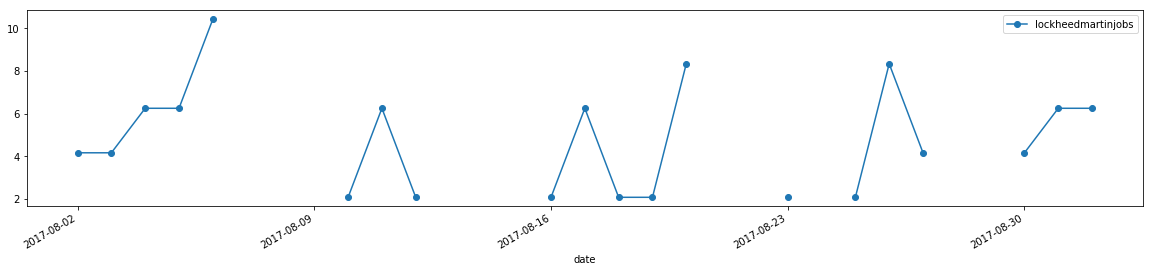

In [6]:
Answer3= pandas.DataFrame({"Word": TFIDF.idxmax(axis=1), 'TFIDF': TFIDF.max(axis =1)}, columns= ['Word','TFIDF'] )
TFIDF_copy = TFIDF.copy()
TFIDF_copy.index = pandas.to_datetime(TFIDF_copy.index)
TFIDF_copy[['lockheedmartinjobs']].plot(legend=True, marker='o', figsize=(20,4))


**Update:** In the timeseries above we see that the word 'lockheedmartinjobs' started to appear at the start of september and then there were no more instances once october began. With this we can assume that this employee stopped working/was fired that month.

**Question:** Who was accessing this site?


**Analysis:**

In [7]:
websitesLockheed = []
for index, row in websites.iterrows():
    if 'lockheedmartinjobs' in row.url.lower():
        websitesLockheed.append(row)

websitesLockheed = pandas.DataFrame(websitesLockheed)
websitesLockheed


,id,date,user,pc,url
419442,{Z5W8-Q4QO69JI-5334SLVP},08/02/2017,CCH0959,PC-0588,http://lockheedmartinjobs.com/jobs/available.html
419633,{X2V2-V8FH03QW-4001TYHP},08/02/2017,CCH0959,PC-0588,http://lockheedmartinjobs.com/searchall/search...
422906,{S7C8-J8GH90UP-8326WBLZ},08/03/2017,CCH0959,PC-0588,http://lockheedmartinjobs.com/searchhome/searc...
422992,{D3I0-W4AX21FE-7902VRST},08/03/2017,CCH0959,PC-0588,http://lockheedmartinjobs.com/college/college....
431454,{A2K0-Z8BF29QP-5159UTOG},08/04/2017,CCH0959,PC-0588,http://lockheedmartinjobs.com/jobs/chat.html
433225,{F6S2-S6ES37YC-8760PUVI},08/04/2017,CCH0959,PC-0588,http://lockheedmartinjobs.com/college/listings...
433615,{Y0Z8-R6QT22GL-7425QGQM},08/04/2017,CCH0959,PC-0588,http://lockheedmartinjobs.com/jobs/listings.html
435138,{K7N1-P1ZZ62YX-1552YFQL},08/05/2017,CCH0959,PC-0588,http://lockheedmartinjobs.com/search/college.html
435975,{I1V5-Z5CY05QR-9583IFLE},08/05/2017,CCH0959,PC-0588,http://lockheedmartinjobs.com/qualifications/i...
439288,{G5Z4-Z2OE92NS-8979MJYK},08/05/2017,CCH0959,PC-0588,http://lockheedmartinjobs.com/searchhome/resul...


**Update:** After filtering out all the instances of 'lockheedmartinjobs' we see that all of these searches are done by the same employee: Cedric Cyrus Harrison. Starting on August 2 and ending on September 1, we see continous visits to lockheedmartinjobs. If we look at the last website he visited:

In [8]:
websitesLockheed.url.values[-1]

'http://lockheedmartinjobs.com/job_application/congratulations.html'

We see the word 'congratulations' which suggests he has been offered a job by Lockheed Martin on 9/1 while his last known login was on 9/30. This gives Cedric a whole month of working at the company while having the possibility of having suspicious motives. 

**Question**  Was there a gap in the frequency in which Cedric Cyrus Harrison logged in?

If there exists a gap in the frequency in which Cedric Cyrus Harrison logged in, it would indicate that although his last login was on 9/31, he couldve stopped working before and then logged in to do something suspicious. 

**Analysis:**

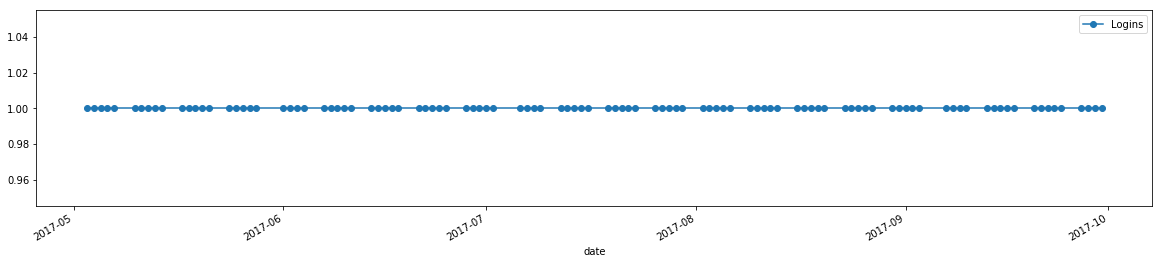

In [9]:
logonCedric = logon[logon.user == 'CCH0959']
logonCedric = logonCedric[logonCedric.activity == 'Logon']
logonCedric['date'] = logonCedric.date.str.slice(0,10)
logonCedric.index = pandas.to_datetime(logonCedric.date)
logonCedric['Logins'] = 1
logonCedric.Logins.plot(legend=True, marker='o', figsize=(20,4))



**Update:** We can see that Cedric had continously logged everyday(asides from weekends) for the entirery of his employment. Since there was no gap, Cedric is no longer a suspicious employee, as it simply seemed he wanted to change jobs. 

### Question : Did  the leaker log in at unsual hours and login a large amount of devies?


In order to test this hypothesis we will get the average hour of login for the fired users, and plot it against the total amount of devices connected. We will then use clustering to determine a suspicious group of people.

In [10]:
logonTime = logon[logon.activity == 'Logon']
logonTime['time'] = logonTime.date.str.slice(11)
logonTime['time'] = logonTime.time.apply(lambda x: int(x.split(':')[0]) + float(int(x.split(':')[1])/60))
averageTime = logonTime.groupby(['user'])['time'].agg(lambda x: x.unique().mean())

deviceNum = devices[devices.activity == 'Connect'] 
deviceNumPerson = deviceNum.groupby(['user'])['id'].nunique()

timeDevices = pandas.DataFrame(averageTime)

deviceList = []
for user in timeDevices.index.values:
    try:
        deviceList.append(deviceNumPerson[user])
    except KeyError:
        deviceList.append(0)
timeDevices['devices'] = deviceList
timeDevices

C:\Users\Bilando\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Bilando\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,time,devices
user,,
AAC0070,7.391667,0
AAP0946,11.692298,0
AAR0716,10.460580,0
AAS0850,12.129808,120
ABG0865,11.738490,0
ABH0821,11.263699,58
ABM0089,8.246111,0
ABM0173,7.158333,0
ABS0125,12.741296,0


Now that we have a table with the average time a given user logins and the toal amount of times a user has connected a device we can plot these values and see if we can classify them. 

In [11]:
normalized = timeDevices.copy(deep = True)

for column in normalized: 
    if normalized[column].dtype.kind in 'bifc':
        normalized[column] = (normalized[column] - normalized[column].mean())/ normalized[column].std()
    else:
        del normalized[column]

        
normalized.time = normalized.time.abs()
km = sklearn.cluster.KMeans(n_clusters = 8, n_init=1) #kinits initialization does not work, cannot find proper way to do it
labels = km.fit_predict(normalized)
                                 
normalized['Cluster'] = labels
normalized

,time,devices,Cluster
user,,,
AAC0070,1.078707,-0.317747,3
AAP0946,1.302546,-0.317747,3
AAR0716,0.620545,-0.317747,0
AAS0850,1.544794,0.154598,7
ABG0865,1.328122,-0.317747,3
ABH0821,1.065231,-0.089447,3
ABM0089,0.605603,-0.317747,0
ABM0173,1.207904,-0.317747,3
ABS0125,1.883374,-0.317747,6


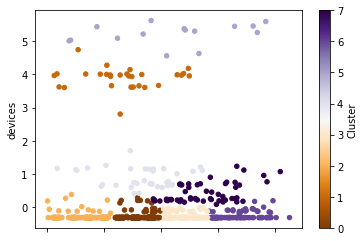

In [12]:
ax = normalized.plot.scatter(x = 'time', y = 'devices', c = 'Cluster', cmap = 'PuOr')


**Update**: As the data is standarized it does not show the number of devices connected but rather the standard deviation of devices connected. The time is the X axis and it is also standarized and taken the absolute value of. So people who login at times outside of the average will be further to the right. The top right corner of this graph represents the most suspicious group of people as they connected a large amount of devices and logged in at times outside of the norm.

**Question:**  Is the leaker one of the outliers on the graph?

**Analysis:**

In [13]:
suspects = normalized[(normalized.Cluster == 7)]
print(suspects.index.values)

['AAS0850' 'AQH0426' 'ASN0508' 'AUS0564' 'AVJ0078' 'BLW0787' 'BMG0006'
 'BNF0925' 'BRS0849' 'BZT0160' 'CBH0656' 'CEB0158' 'CFB0216' 'CRM0852'
 'CSF0671' 'CSG0640' 'DCW0087' 'DKP0403' 'DQM0392' 'DWG0209' 'EGL0836'
 'GAP0417' 'GLW0278' 'GTF0396' 'HMR0409' 'HWB0420' 'IAS0626' 'IJM0436'
 'JAJ0183' 'JAO0817' 'JDH0545' 'JNC0320' 'JQV0922' 'JRV0778' 'JTC0313'
 'JVS0212' 'KCB0534' 'KCF0224' 'KRH0812' 'LGW0987' 'MLO0553' 'MOP0874'
 'MQM0127' 'NLB0989' 'NQT0979' 'OCB0146' 'RHR0856' 'RPH0848' 'RRB0952'
 'TGF0571' 'TGM0589' 'TUB0881' 'TYR0442' 'TZD0878' 'VDB0894' 'ZED0676'
 'ZNS0213']


**Update:** The list above contains the usernames of people this investigation consiters suspicious, as they were classified as having the must unsual amount of devices and average login times. Out of this list, we should check if any of them were fired, as that would allow us to focus on who to continue investigating. The code below prints those users, if any. 

In [14]:
for suspect in suspects.index.values:
    if(suspect in fired.user_id):
        print(suspect)

**Discussion 1:** The suspects we filtered out were not part of those who were fired. Visualizing our data showed us different variations of our suspects, but unfortunately none of them had any solid incriminating evidence we could go off. However we also helped narrow down the culprit by getting rid of any uncertainties we had about other suspicious characters which will help us in our analysis going forward.

**Hypothesis 2:** The culprit used emails to exchange sensitive information during suspicious hours

**Analysis: **

In [15]:
#Read in Email Info File
email = pandas.read_csv('email_info.csv')
#Changes 'from' to 'email' so we can merge the columns based on their emails so we can match their activity to their names
email.rename(columns={'from':'email'}, inplace=True)

employee = pandas.read_csv('employee_info.csv')


employee777 = employee.drop_duplicates(subset='employee_name', keep="last")
firedList777 = employee777[employee777.month!='11/1/17']

#Also takes in role and supervisor as there may be more suspicious factors such as collusion with a supervisor 
device2 = pandas.merge(email, employee[['employee_name','month','user_id', 'email', 'role', 'supervisor']], on='email')

device2['date'] = device2.date.str.slice(10,13)

device2['date']= pandas.to_numeric(device2['date'])

#Average time plugging in USBs is around 12:30pm(noon)
avg = device2.date.mean()

#Standard deviation is ~3.5 which if we use 2 standard deviations away, we get a general time everyone was plugging USBs/working
#Average working hours is concluded to be ~6am - ~7pm
deviate = device2.date.std();

#before 6 am, 137 emails sent out
sus = device2[device2.date < 6] 

#after 7pm, 203 emails sent out
sus1 = device2[device2.date > 19]

sus

,id,date,to,email,size,attachments,employee_name,month,user_id,role,supervisor
85463,{C8G1-J9WL30HY-9035QXNG},3,Dennis.Carson.Mendoza@dtaa.com;Paula.Dorothy.D...,Burton.Maxwell.Levy@dtaa.com,27191,0,Burton Maxwell Levy,5/1/17,BML0845,Salesman,Dennis Carson Mendoza
85464,{C8G1-J9WL30HY-9035QXNG},3,Dennis.Carson.Mendoza@dtaa.com;Paula.Dorothy.D...,Burton.Maxwell.Levy@dtaa.com,27191,0,Burton Maxwell Levy,6/1/17,BML0845,Salesman,Dennis Carson Mendoza
85465,{C8G1-J9WL30HY-9035QXNG},3,Dennis.Carson.Mendoza@dtaa.com;Paula.Dorothy.D...,Burton.Maxwell.Levy@dtaa.com,27191,0,Burton Maxwell Levy,7/1/17,BML0845,Salesman,Dennis Carson Mendoza
85466,{C8G1-J9WL30HY-9035QXNG},3,Dennis.Carson.Mendoza@dtaa.com;Paula.Dorothy.D...,Burton.Maxwell.Levy@dtaa.com,27191,0,Burton Maxwell Levy,8/1/17,BML0845,Salesman,Dennis Carson Mendoza
85467,{C8G1-J9WL30HY-9035QXNG},3,Dennis.Carson.Mendoza@dtaa.com;Paula.Dorothy.D...,Burton.Maxwell.Levy@dtaa.com,27191,0,Burton Maxwell Levy,9/1/17,BML0845,Salesman,Dennis Carson Mendoza
85468,{C8G1-J9WL30HY-9035QXNG},3,Dennis.Carson.Mendoza@dtaa.com;Paula.Dorothy.D...,Burton.Maxwell.Levy@dtaa.com,27191,0,Burton Maxwell Levy,10/1/17,BML0845,Salesman,Dennis Carson Mendoza
85469,{C8G1-J9WL30HY-9035QXNG},3,Dennis.Carson.Mendoza@dtaa.com;Paula.Dorothy.D...,Burton.Maxwell.Levy@dtaa.com,27191,0,Burton Maxwell Levy,11/1/17,BML0845,Salesman,Dennis Carson Mendoza
127548,{X0N3-K6ZF86MG-5753VWNI},1,Jerry.Vincent.Shepherd@dtaa.com,Whilemina.Shafira.Perry@dtaa.com,33451,0,Whilemina Shafira Perry,5/1/17,WSP0210,ITAdmin,Jaquelyn Yoshi Mckinney
127549,{X0N3-K6ZF86MG-5753VWNI},1,Jerry.Vincent.Shepherd@dtaa.com,Whilemina.Shafira.Perry@dtaa.com,33451,0,Whilemina Shafira Perry,6/1/17,WSP0210,ITAdmin,Jaquelyn Yoshi Mckinney
127614,{X6A4-A8HX56HO-2481TEQS},1,Wendy.Stacy.Norman@dtaa.com,Whilemina.Shafira.Perry@dtaa.com,38412,0,Whilemina Shafira Perry,5/1/17,WSP0210,ITAdmin,Jaquelyn Yoshi Mckinney


**Update:**
This information is not narrowed down enough as there are still easily over 100 different cells to work with based off the dataframe I created that turned the dates into times that are easily managed with as an int. So the next step would be to narrow down the large list of suspicious people with people who have been fired using earlier data we analyzed.

**Question:** Did any of the employees who were fired act suspicious and or work with each other using emails?

**Analysis: **

In [16]:
#There is one fired employee who sent emails at 1am who was on my suspicious list
activity = sus[sus.isin(list(firedList777.employee_name)).employee_name==True]

#There are no fired employees who sent emails after 7pm who was on my suspicious list
activity1 = sus1[sus1.isin(list(firedList777**Analysis: **.employee_name)).employee_name==True]
activity

SyntaxError: invalid syntax (<ipython-input-16-01062762ec78>, line 5)

**Update:** My leads were not as promising as I had thought but I am at least able to work with one suspicious person Whilemina Shafira Perry and can now track her activity to see if she interacts with anyone who is more suspicious

**Question:** Who was Whilemina Shafira Perry interacting with in the other given data files, specifically device information

**Analysis: **

In [ ]:
#Read in Device Info File
device = pandas.read_csv('device_info.csv')

#Changes 'user' to 'user_id' so we can merge the columns based on their user IDS so we can match their activity to their names
device.rename(columns={'user':'user_id'}, inplace=True)

#Also takes in role and supervisor as there may be more suspicious factors such as collusion with a supervisor 
device2 = pandas.merge(device, employee[['employee_name','month','user_id', 'role', 'supervisor']], on='user_id')

#Slices and replaces the date with the hour of day out of 24 hours and converts the string to an int
device2['date'] = device.date.str.slice(10,13)
device2['date']= pandas.to_numeric(device2['date'])


#People working before 6am(Using usb devices)
sus = device2[device2.date < 6] 

#People working after 7pm(Using usb devices)
sus1 = device2[device2.date > 19]



#Searching for people we found suspicious
a = sus1[sus1.pc == 'PC-4442']
b = sus[sus.pc == 'PC-4442']


#Finds PCs that are used a lot/not used too much
df = device.groupby('pc')['id'].nunique()

maxNum = df.max()  #2996 times used
maxPC = df.idxmax() #PC - 2094

minNum = df.min() #20
minPC = df.idxmin() #PC-4442

i = 0

#This code is commented out because it is no longer necessary
#I tried to see if there was anyone sharing computers during suspicious hours but nothing came up
#Whilemina is hard to incriminate, might be innocent

#while(i < 212):
    #print (sus1[sus1.pc == df.index[i]])
    #i+=1
    
    
#CSF0929
#device2[device2.employee_name == 'Chaney Sean Fuentes']

#sus1[sus1.employee_name == 'Chaney Sean Fuentes']

#sus
#714 INSTANCES of people who connected and disconnected USBs before 6am

#1100 INSTANCES of people who connected and disconnected USBs after 6pm
#sus1


deviceG = device.groupby('user_id')

date = deviceG.pc.aggregate(' '.join)
#All the pcs accessed by each user
date1 = date.apply(lambda t: [w for w in t.split()])
#Number of times each PC is accessed by a user, can find different occurences
date2 = date1.apply(lambda bag: pandas.Series(bag).value_counts())


#d1[d1.ProductionLineWorker >= 0]

any(date1[0].count(x) > 1 for x in date1[0])


#Check if all the users logged into their own PCS
"""
for i in range(len(date1)):
    print(len(set(date1[i])) > 1)
"""

list1 = []
type(date2.isna().sum())
dateX = date2.isna().sum()

x = 0

for i in range(212):
    if dateX[i] != 214:
        list1.append(dateX[i])
        list1.append(x)
        
    x+=1
dateX.index[107]

#PCS that have been shared
#PC-3207  PC-0583  PC-1386

date1

**Update:** I tried sorting different data frames and grouping by unique ids to see if there is any evidence of Whilemina committing any suspicious acts.  I could not further incriminate Whilemina based off using other peoples PC's and her interactions with other suspicious people and their device info. 

**Question:** Could we get closer to the true culprit by filtering through each fired person's URL history?

**Analysis: **

In [17]:
http = pandas.read_csv('http_info.csv')


   #CSF0929
    #'Chaney Sean Fuentes'
#y = http[http.user == 'CSF0929']


df = http.groupby('url')['pc'].nunique()

labels = pandas.DataFrame(df, columns=['Word'], index = df.index)
df = df.sort_values()

#JQV0922
#Jada Quinn Vang	JQV0922

#TUB0881   Theodore Upton Barry

#y.to_csv('httpPro.csv')

#Check the URL column and search for suspicious keywords such as submit, hack, crack, upload, download
#Usually submission URLS contain phrases in HTML that allows a user to upload a document

#Too generic, won't work
a = http[http['url'].astype(str).str.contains('/hack')]
#CCH0959 user was looking for a job
b = http[http['url'].astype(str).str.contains('/submit')]



#DING DING, User found accessing WikiLeaks.org multiple times with the /upload URL included
c = http[http['url'].astype(str).str.contains('/upload')]

#Cracked.com is popular website, too many websites
d = http[http['url'].astype(str).str.contains('/crack')]

print(c)

                              id                 date     user       pc  \
275994  {D4G0-L1MD77CY-0097ZJPN}  07/01/2017 03:32:01  CSF0929  PC-4442   
297603  {H4M6-U2YQ64OS-4770SRPX}  07/08/2017 06:31:52  CSF0929  PC-4442   
323028  {L8D6-L5UN71HC-9011NFYE}  07/14/2017 04:20:11  CSF0929  PC-4442   
334334  {D4G5-M1HQ54WN-2859PYMU}  07/16/2017 04:12:16  CSF0929  PC-4442   

                                            url  
275994   http://wikileaks.org/upload/maker.html  
297603   http://wikileaks.org/upload/facts.html  
323028  http://wikileaks.org/upload/import.html  
334334  http://wikileaks.org/upload/source.html  


**Update:** The same user is accessing a website known notoriously for leaking government documents. They access the same computer and are visiting the websites during very suspicious hours... and what do you know, they were on the list of people who were fired!

**Discussion 2:** Initially I was trying to setup a foundation where people who were exchanging emails during off hours were compared to the list of people who were fired. However I hit a road block and saw that the people who were fired must have been acting suspiciously elsewhere and the most incriminating thing to find would be the URLs they were visiting. This leads us to pursue a very suspicious individual which given the previous evidence, allows us to have a strong reasoning for looking more into him, both analytically and visually.

**Hypothsis 3: The leaker has suspicious night activities, BEFORE he/she left the company. **
* Leakers don't want to be caught, so they usually pick time which people get off work.
* Leakers also either resign before they get caught, or being found out then fired by the company.

**Analysis**
* First, We come up a data frame of employees leaving the company between May and October. 
* We merge the employee info table with other datasets into indiviual data frames, then we match the fired employees' names, and get the data frames of fired employees' work activity.
* We extract the data frames during unusual hours before 7am or after 8pm, then get a list of suspicious names.
* To narrow down the list of names, we extract the list of persons who have multiple types of activities

In [ ]:
employee777 = pandas.read_csv('employee_info.csv')
employee777 = employee777.drop_duplicates(subset='employee_name', keep="last")
firedList777 = employee777[employee777.month!='11/1/17']

device777 = pandas.read_csv('device_info.csv')
device777.rename(columns={'user':'user_id'}, inplace=True)
device777 = pandas.merge(device777, employee777[['employee_name','month','user_id']], on='user_id')
deviceAct777 = device777[device777.isin(list(firedList777.employee_name)).employee_name==True]
deviceAct777['hour'] = deviceAct777['date'].str[11:13]
deviceAct777 = deviceAct777[(deviceAct777.hour.astype('int64') >= 20) | (deviceAct777.hour.astype('int64') <= 6)]
deviceList777 = deviceAct777.employee_name.value_counts().index #List of fired employees who have night device activities

email777 = pandas.read_csv('email_info.csv')
email777['employee_name'] = email777['from'].str.split('@')
email777['employee_name'] = email777['employee_name'].str[0]
email777['employee_name'] = email777['employee_name'].str.replace('.',' ')
email777 = pandas.merge(email777, employee777[['employee_name','month','user_id']], on='employee_name')
emailAct777 = email777[email777.isin(list(firedList777.employee_name)).employee_name==True]
emailAct777['recipient'] = emailAct777['to'].str.split(';')
emailAct777['hour'] = emailAct777['date'].str[11:13]
emailAct777 = emailAct777[(emailAct777.hour.astype('int64') >= 20) | (emailAct777.hour.astype('int64') <= 6)]
emailList777 = emailAct777.employee_name.value_counts().index #List of fired employees who have night email activities

logon777 = pandas.read_csv('logon_info.csv')
logon777.rename(columns={'user':'user_id'}, inplace=True)
logon777 = pandas.merge(logon777, employee777[['employee_name','month','user_id']], on='user_id')
logonAct777 = logon777[logon777.isin(list(firedList777.employee_name)).employee_name==True]
logonAct777['hour'] = logonAct777['date'].str[11:13]
logonAct777 = logonAct777[(logonAct777.hour.astype('int64') >= 20) | (logonAct777.hour.astype('int64') <= 6)]
logonList777 = logonAct777.employee_name.value_counts().index #List of fired employees who have night log on activities

http777 = pandas.read_csv('http_info.csv')
http777.rename(columns={'user':'user_id'}, inplace=True)
http777 = pandas.merge(http777, employee777[['employee_name','month','user_id']], on='user_id')
httpAct777 = http777[http777.isin(list(firedList777.employee_name)).employee_name==True]
httpAct777['hour'] = httpAct777['date'].str[11:13]
httpAct777 = httpAct777[(httpAct777.hour.astype('int64') >= 20) | (httpAct777.hour.astype('int64') <= 6)]
httpList777 = httpAct777.employee_name.value_counts().index #List of fired employees who have night website activities

NightAct777 = logonList777[(logonList777.isin(deviceList777)) & (logonList777.isin(httpList777))]
website777 = httpAct777[httpAct777.isin(list(NightAct777)).employee_name==True]
website777

In [ ]:
CSEdevice777 = deviceAct777[deviceAct777.employee_name=='Chaney Sean Fuentes']
CSEdevice777['day'] = CSEdevice777['date'].str[0:10]
CSEdevice777.day.value_counts().plot(kind='bar', title='Chaney Sean Fuentes Device Activities Every Day')

In [ ]:
CSE777 = logon777[logon777.employee_name=='Chaney Sean Fuentes']
CSE777['month'] = CSE777['date'].str[0:2]
CSE777.month.value_counts().plot(kind='bar', title='Chaney Sean Fuentes Computer Log On Activities Every Month')

**Update:** The list contains log on activites, websites activities. Device activities is the most intersting one to us. We think emailing to other people is less dangerous activity for leakers. While we match the list of names with night website activities, we found earlier, an employee named Chaney Sean Fuentes has visited the Wikileaks multiple times during suspicious hours. We dig into his other activities, and find his also plug in devices during suspicious hours.

**Question:** Does Chaney Sean Fuentes contact other employees in this company that could hint at some form of collusion?

In [ ]:
CSEEmail777 = email777[email777.employee_name=='Chaney Sean Fuentes']

CSEEmail777['recipient'] = CSEEmail777['to'].str.split(';')
recipient = []
for i in CSEEmail777.recipient:
    recipient += i
recipient = set(recipient)
insideRecipient = [x for x in recipient if "@dtaa.com" in x ]
insideRecipient = [w.replace('@dtaa.com', '') for w in insideRecipient]
insideRecipient = [w.replace('.', ' ') for w in insideRecipient]
CSEcontact777 = employee777[employee777.isin(insideRecipient).employee_name==True]
CSEcontact777[CSEcontact777.employee_name.isin(firedList777.employee_name)==True]
logonAct777[logonAct777.employee_name=='Jada Quinn Vang']
deviceAct777[deviceAct777.employee_name=='Jada Quinn Vang']
httpAct777[httpAct777.employee_name=='Jada Quinn Vang']

**Update:** We found a employee named Jada Quinn Vang who is also a production line worker and left the company in September, but this person doesn't have any night activity.

**Question:**  Did he only log into one computer?

**Analysis:**

In [ ]:
logonLeaker = logon[logon.user == 'CSF0929']

In [ ]:
logonLeaker

**Update:** We see that the leaker  always logins into PC-4442. 

**Question:** Does anyone else login to Mr. Fuentes's computer?

**Analysis:**

In [ ]:
logonLeakerPC = logon[logon.pc == 'PC-4442']
groupy = logonLeakerPC.groupby('pc')
people = groupy.user.aggregate(' '.join)
TFpeople = people.apply(lambda bag: pandas.Series(bag).value_counts())

loginUsers = TFpeople.columns.values
loginUsers = loginUsers[0].split(' ')
peopleSet = set(loginUsers)
peopleSet

**Update:** That is the list of usernames that have shared computers with our suspected leaker. 

**Question** Did they login at times near when our leaker was doing leaking?

In [ ]:
logonLeakerPcHKW0211 = logonLeakerPC[logonLeakerPC.user == 'HKW0211']
logonLeakerPcHKW0211

In [ ]:
logonLeakerPcTRW0379 = logonLeakerPC[logonLeakerPC.user == 'TRW0379']
logonLeakerPcTRW0379

In [ ]:
logonLeakerPcUAP0214 = logonLeakerPC[logonLeakerPC.user == 'UAP0214']
logonLeakerPcUAP0214

In [ ]:
logonLeakerPcZNS0213 = logonLeakerPC[logonLeakerPC.user == 'ZNS0213']
logonLeakerPcZNS0213

**Update:** Nope. Those people were not around when Mr. Fuentes was doing leaking information

**Discussion 3:** We believe Chaney Sean Fuentes is the leaker, since he has numerous night activities that do not reflect his role as a ProductionLineWorker and seeing he visited Wikileaks. When visiting Wikileaks, he also connects a USB and disconnects it after he is presumamably done leaking information. Though we are not able to find the employees he has contacted with any unusual activities.

# Results

**WHO**

User CSF0929, 'Chaney Sean Fuentes'
 
**WHAT**
 
Visiting and uploading information to wiki leaks during suspicious hours. Plugs in a USB and disconnects everytime during the time where he accesses the website. He is a ProductionLineWorker which means he should not be engaging in this kind of suspicious activity unless he's an ITAdmin or Engineer of some sort. 

**WHEN**
 
 Accessed wikileaks during these times:
 
7/1/17    **3:32 am**

7/8/17    **6:31 am**

7/14/17   **4:20 am**

7/17/17   **4:12 am**


Plugged in USB during these same days around the same times:

7/1/17 Connected on 2:23am

      Disconnected on 3:53am

7/8/17  Connected on 6:18am

      Disconnected 6:46am
       
7/14/17 Connected on 2:05am

      Disconnected on 4:26am

      Connected on 5:44am
        
      Disconnected on 5:50am
        
7/16/17 Connected on 4:11am

      Disconnected 4:22am       
       

**WHERE**
 
Found in HTTP_INFO, Devices, log on sheets. 
All occured where PC-4442 is located

 **WHY**

Their specificed role(ProductionLineWorker) does not match with their actions. All of these actions occured during suspicious hours, and he is visiting a website known notoriously for leaking governement related documents while currently employed in a government facility. The person probably has a grudge or was offered money for leaking the information.


# Contribution

**Daniele Correa:**  Hypothesis 1, Seeing if users logged into Mr. Fuentes computer
<br>**Wanqian Wei:** Hypothesis 3, list creation
<br>**Bilal Taha:** Hypothesis 2, formatting and structure